<a href="https://colab.research.google.com/github/JOteng15/OGTIP_Project-3/blob/main/OGTIP_Project_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [362]:
#data visualisation and processing
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import numpy as np
from tabulate import tabulate


#machine learning and performance evaluation
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier




from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score,accuracy_score,f1_score
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

from sklearn.model_selection import train_test_split
from sklearn import metrics


In [363]:
df = pd.read_csv("Student_academic.csv")


In [364]:
data = df.copy()


In [365]:
data.shape

(4424, 35)

In [366]:
data.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,8,5,2,1,1,1,13,10,6,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,6,1,11,1,1,1,1,3,4,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,5,1,1,1,22,27,10,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,8,2,15,1,1,1,23,27,6,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,12,1,3,0,1,1,22,28,10,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


In [367]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 35 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance                      4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Nacionality                                     4424 non-null   int64  
 7   Mother's qualification                          4424 non-null   int64  
 8   Father's qualification                          4424 non-null   int64  
 9   Mother's occupation                      

In [368]:
data.isnull().sum()

Marital status                                    0
Application mode                                  0
Application order                                 0
Course                                            0
Daytime/evening attendance                        0
Previous qualification                            0
Nacionality                                       0
Mother's qualification                            0
Father's qualification                            0
Mother's occupation                               0
Father's occupation                               0
Displaced                                         0
Educational special needs                         0
Debtor                                            0
Tuition fees up to date                           0
Gender                                            0
Scholarship holder                                0
Age at enrollment                                 0
International                                     0
Curricular u

In [369]:
data.columns

Index(['Marital status', 'Application mode', 'Application order', 'Course',
       'Daytime/evening attendance', 'Previous qualification', 'Nacionality',
       'Mother's qualification', 'Father's qualification',
       'Mother's occupation', 'Father's occupation', 'Displaced',
       'Educational special needs', 'Debtor', 'Tuition fees up to date',
       'Gender', 'Scholarship holder', 'Age at enrollment', 'International',
       'Curricular units 1st sem (credited)',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 1st sem (without evaluations)',
       'Curricular units 2nd sem (credited)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (approved)',
       'Curricular units 2nd sem (grade)',
       'Curricular units 2nd sem (without evaluations)

In [370]:
data.rename({"Nacionality":"Nationality"})

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,8,5,2,1,1,1,13,10,6,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,6,1,11,1,1,1,1,3,4,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,5,1,1,1,22,27,10,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,8,2,15,1,1,1,23,27,6,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,12,1,3,0,1,1,22,28,10,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,1,1,6,15,1,1,1,1,1,6,...,0,6,8,5,12.666667,0,15.5,2.8,-4.06,Graduate
4420,1,1,2,15,1,1,19,1,1,10,...,0,6,6,2,11.000000,0,11.1,0.6,2.02,Dropout
4421,1,1,1,12,1,1,1,22,27,10,...,0,8,9,1,13.500000,0,13.9,-0.3,0.79,Dropout
4422,1,1,1,9,1,1,1,22,27,8,...,0,5,6,5,12.000000,0,9.4,-0.8,-3.12,Graduate


In [371]:
data["Target"] = data["Target"].replace({"Graduate": 1, "Dropout": 0, "Enrolled": 2})


In [372]:
data.corr()["Target"].sort_values(ascending = False).drop("Target")

Curricular units 2nd sem (grade)                  0.429214
Curricular units 2nd sem (approved)               0.351135
Curricular units 1st sem (grade)                  0.349652
Tuition fees up to date                           0.342121
Curricular units 1st sem (approved)               0.290243
Curricular units 2nd sem (evaluations)            0.194412
Curricular units 1st sem (evaluations)            0.125278
Scholarship holder                                0.114517
Father's occupation                               0.094916
Mother's occupation                               0.077593
Displaced                                         0.070649
Daytime/evening attendance                        0.066439
Curricular units 2nd sem (enrolled)               0.060670
Curricular units 1st sem (enrolled)               0.052020
GDP                                               0.037052
Application order                                 0.027393
International                                     0.0158

Display of the correlations of various features to the Target column


No missing values so we proceed with data preprocessing and EDA.


<Axes: >

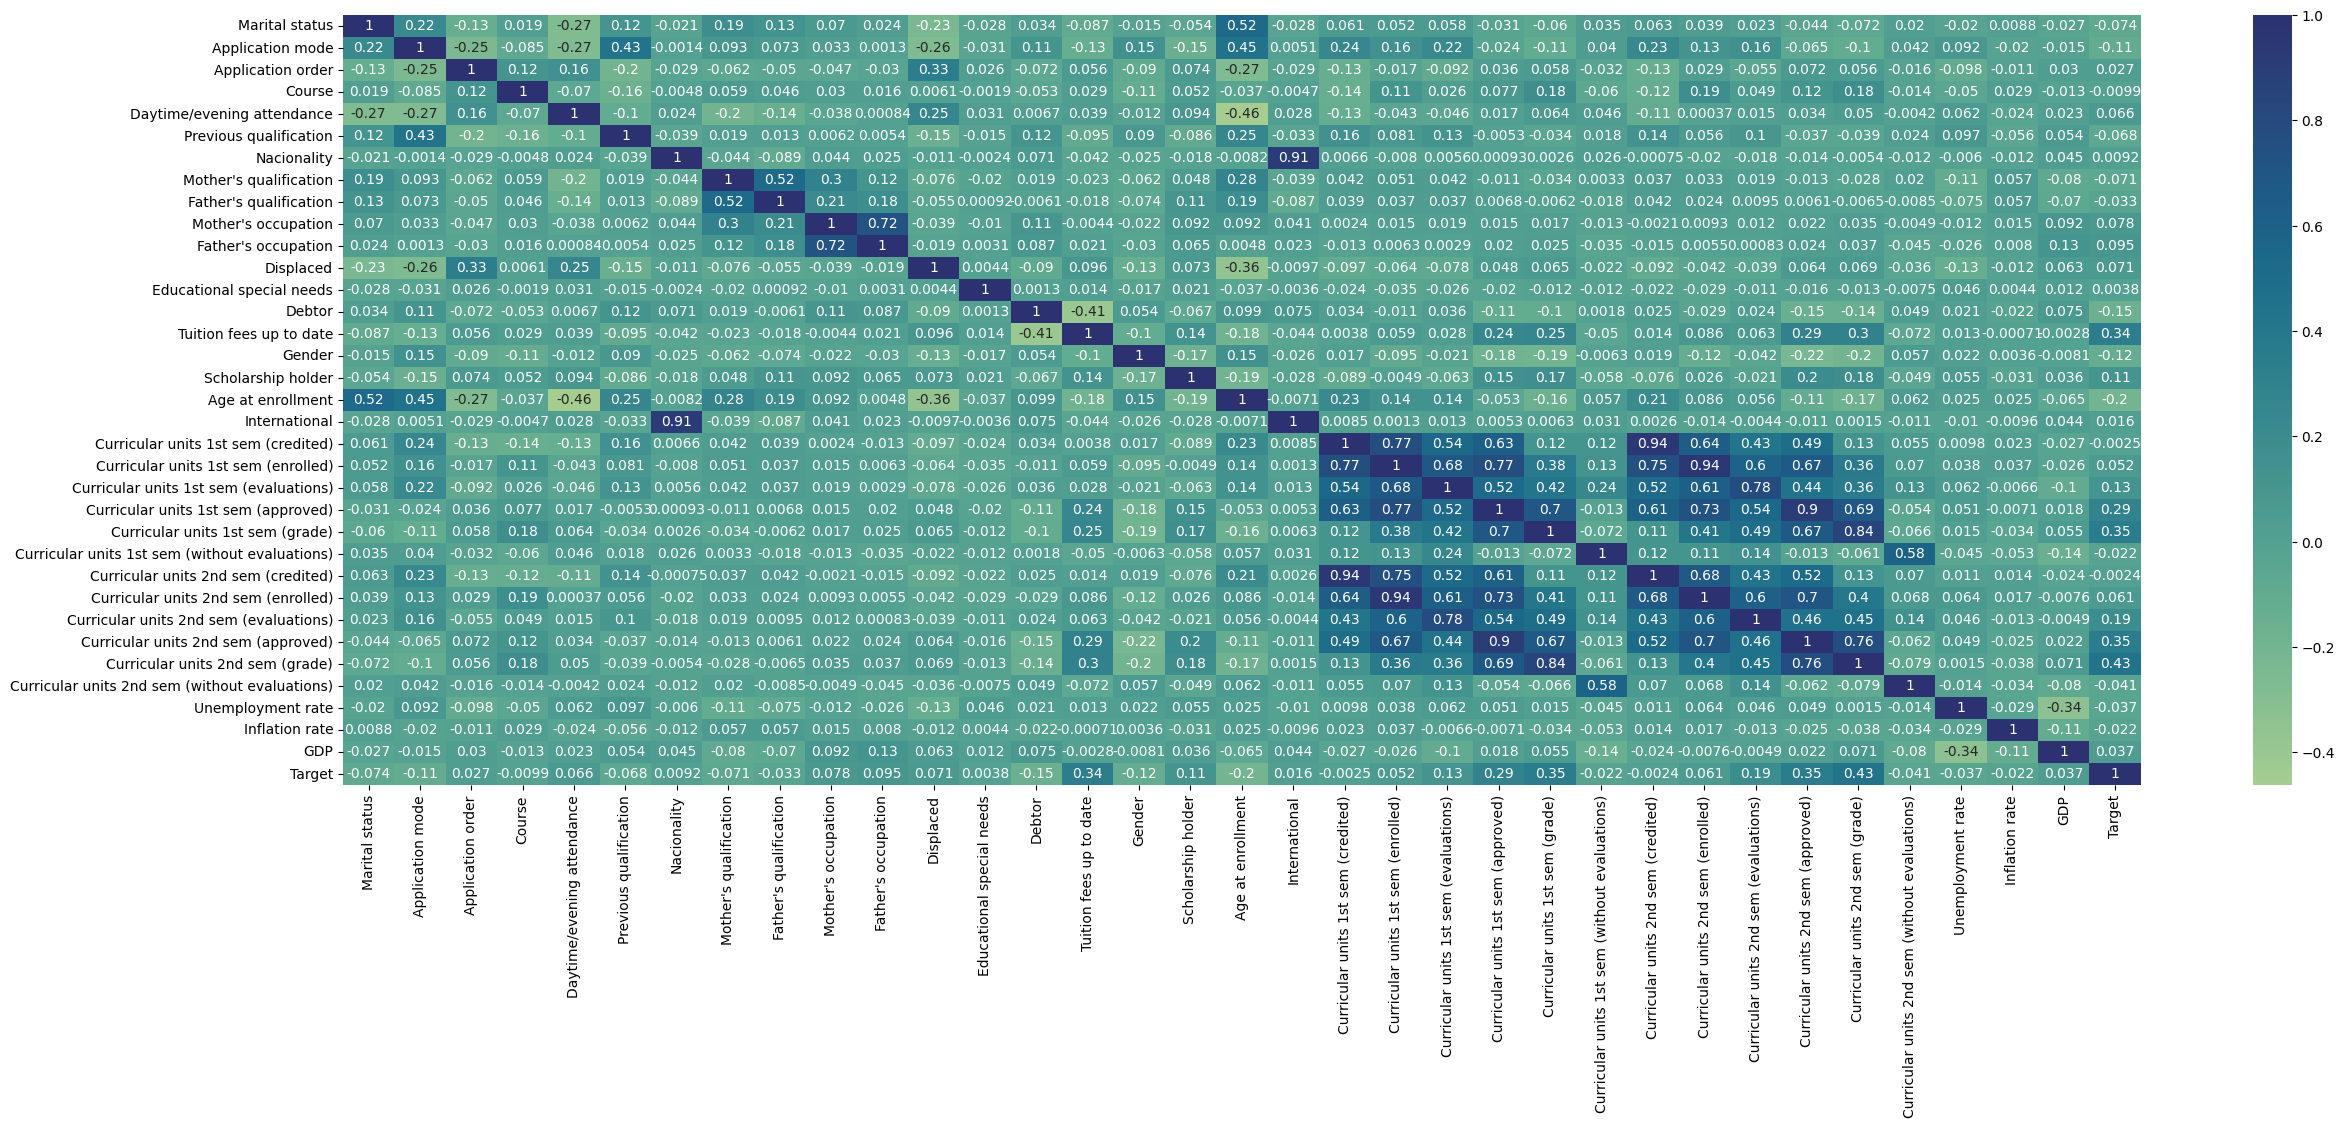

In [373]:
plt.figure(figsize = (29,10))
sns.heatmap(data.corr(),cmap  ="crest",annot = True)

<Axes: >

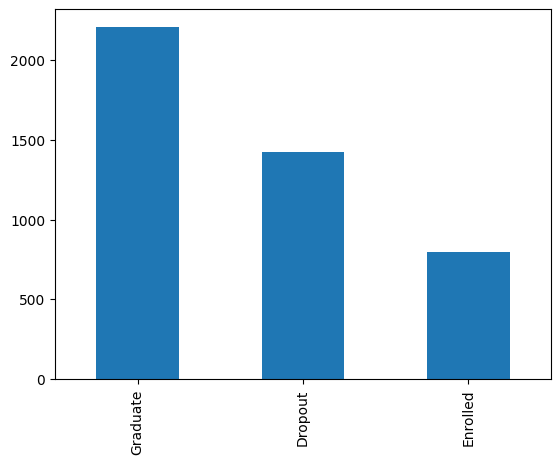

In [374]:
df["Target"].value_counts().plot(kind = "bar")

More graduates than dropouts.

In [375]:
temp_df = df.loc[:,["International","Target"]]
temp_df["International"] = temp_df["International"].replace({0:"Not international",1:"International"})
temp_df = pd.DataFrame(temp_df.value_counts()).reset_index()



In [376]:
px.bar(temp_df,x = "Target",y = 0, color = "International")


Non international studets supersedes international students in all student outcomes.

In [377]:
temp_df = df.loc[:,["Gender","Target"]]
temp_df["Gender"] = temp_df["Gender"].replace({0:"Male",1:"Female"})
temp_df = pd.DataFrame(temp_df.value_counts()).reset_index()

In [378]:
# 2868 1556  57 25 45

We will assume there are more males than females for now.

In [379]:
px.bar(temp_df,x = "Gender",y = 0, color = "Target")


In [380]:
fig = px.scatter(data,
             x = 'Curricular units 1st sem (approved)',
             y = 'Curricular units 2nd sem (approved)',
             color = 'Target')
fig.show()

<Axes: xlabel='Age at enrollment', ylabel='Count'>

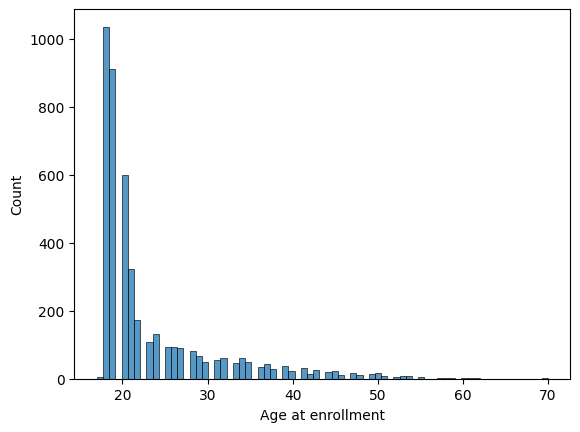

In [381]:
sns.histplot(x = df["Age at enrollment"])


So

In [382]:
#Percentage calculation of gender dropouts, enrollment and graduation
no_males = temp_df[temp_df["Gender"] == "Male"][0].sum()
no_females = temp_df[temp_df["Gender"] == "Female"][0].sum()
temp_df1 = temp_df.copy()
temp_df1[0] = temp_df1[0].apply(lambda x: round(x/no_males,2) if temp_df1["Gender"].tolist()[temp_df1[0].tolist().index(x)] == "Male" else round(x/no_females,2))
temp_df1[0] = temp_df1[0].apply(lambda x:str(x)[-2:]+"%")

In [383]:
lst = [temp_df1.loc[i,:].tolist() for i in range(temp_df1.shape[0])]
col_names = ["Gender","Outcome","Percentage"]

print(tabulate(lst, headers=col_names, tablefmt="fancy_grid"))


╒══════════╤═══════════╤══════════════╕
│ Gender   │ Outcome   │ Percentage   │
╞══════════╪═══════════╪══════════════╡
│ Male     │ Graduate  │ 58%          │
├──────────┼───────────┼──────────────┤
│ Male     │ Dropout   │ 25%          │
├──────────┼───────────┼──────────────┤
│ Female   │ Dropout   │ 45%          │
├──────────┼───────────┼──────────────┤
│ Female   │ Graduate  │ 35%          │
├──────────┼───────────┼──────────────┤
│ Male     │ Enrolled  │ 17%          │
├──────────┼───────────┼──────────────┤
│ Female   │ Enrolled  │ .2%          │
╘══════════╧═══════════╧══════════════╛


In [404]:
a = [["Graduate","Interntional","2%"],["Graduate","Non-international","98%"],["Dropout","International","2%"],["Dropout","Non-international","98%"]
     ,["Enrolled","Non-International","97%"],["Enrolled","International","3%"]]
cols1_names = ["Outcome","Type of student","Percentage"]
print(tabulate(a, headers = cols1_names, tablefmt = "fancy_grid"))

╒═══════════╤═══════════════════╤══════════════╕
│ Outcome   │ Type of student   │ Percentage   │
╞═══════════╪═══════════════════╪══════════════╡
│ Graduate  │ Interntional      │ 2%           │
├───────────┼───────────────────┼──────────────┤
│ Graduate  │ Non-international │ 98%          │
├───────────┼───────────────────┼──────────────┤
│ Dropout   │ International     │ 2%           │
├───────────┼───────────────────┼──────────────┤
│ Dropout   │ Non-international │ 98%          │
├───────────┼───────────────────┼──────────────┤
│ Enrolled  │ Non-International │ 97%          │
├───────────┼───────────────────┼──────────────┤
│ Enrolled  │ International     │ 3%           │
╘═══════════╧═══════════════════╧══════════════╛


In [385]:
temp_df1.loc[0,:].tolist()

['Male', 'Graduate', '58%']

<Axes: ylabel='Density'>

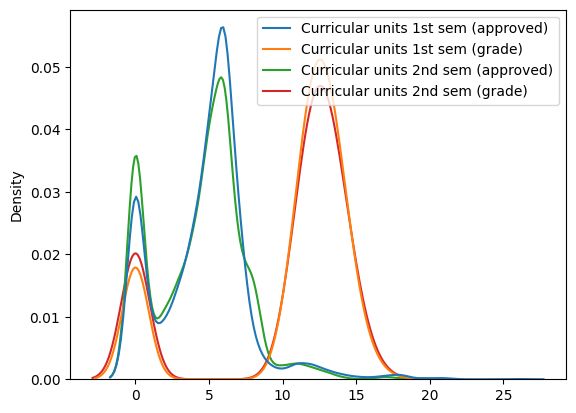

In [386]:
sns.kdeplot(data = df.loc[:,list(df.columns[list(df.columns.str.contains("grade|approved",regex = True))])])


<Axes: >

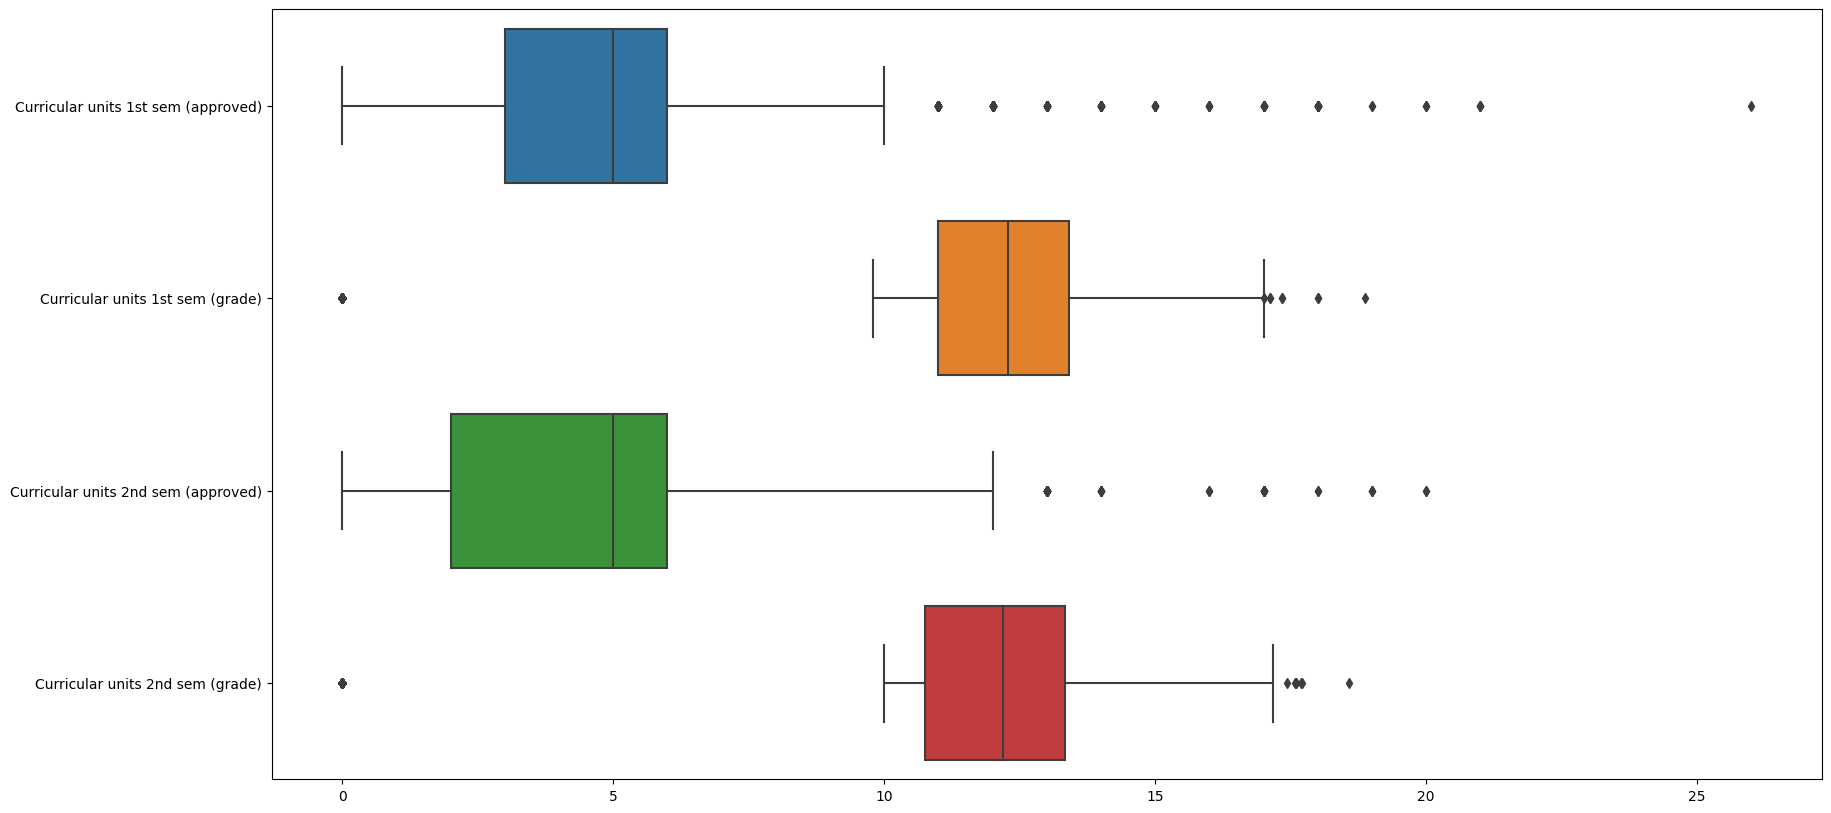

In [387]:
plt.figure(figsize = (20,10))
sns.boxplot(data = df.loc[:,list(df.columns[list(df.columns.str.contains("grade|approved",regex = True))])],orient = "h")

Since we are looking for student dropouts and graduates, enrolment is irrelevant.

In [388]:
frame = df.loc[:,list(df.columns[list(df.columns.str.contains("grade|approved",regex = True))])]





In [389]:
frame.head()

,Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade)
0,0,0.000000,0,0.000000
1,6,14.000000,6,13.666667
2,0,0.000000,0,0.000000
3,6,13.428571,5,12.400000
4,5,12.333333,6,13.000000


In [390]:
#Extracting critical columns for machine learning
Critical_cols = ["Curricular units 2nd sem (approved)","Curricular units 2nd sem (grade)","Curricular units 1st sem (grade)","Curricular units 1st sem (approved)","Tuition fees up to date","Gender" ,"Target"]
#data containing just critical columns
data = data[Critical_cols]
#data containing only graduates and dropouts since our objective involves predicting graduates and dropouts.
data = data[data["Target"] != 2]

In [391]:
#This dataframe extract the dataframe of the criticals
frame = data[Critical_cols]
Q1 = frame.quantile(0.25)
Q3 = frame.quantile(0.75)
IQR = Q3 - Q1
ml_data = data[~((frame < (Q1 - 1.5 * IQR)) |(frame > (Q3 + 1.5 * IQR))).any(axis=1)]




#Training the dataset
In this section we will train the dataset and perform the relevant machine learning algorithms.

In [392]:
y = ml_data['Target']

X = ml_data.drop("Target", axis = 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)





In [393]:
standard_scaler = StandardScaler()
X_scaled_train = standard_scaler.fit_transform(X_train)
X_scaled_test = standard_scaler.fit_transform(X_test)

pca = PCA(n_components=3)
X_scaled_train= pca.fit_transform(X_scaled_train)
X_scaled_test = pca.transform(X_scaled_test)

In [394]:
from xgboost import XGBClassifier

models = {"Random Forest": RandomForestClassifier(),
        "Logistic Regression":LogisticRegression(),
        "SVC":LinearSVC(),
        "XGBoost":XGBClassifier(),
          "Decision Tree": DecisionTreeClassifier(),
          "Naives Bayes": GaussianNB()}

rndf =  RandomForestClassifier()
rndf.fit(X_scaled_train,y_train)

log = LogisticRegression()
log.fit(X_scaled_train,y_train)

lsvc = LinearSVC()
lsvc.fit(X_scaled_train,y_train)

xgb = XGBClassifier()
xgb.fit(X_scaled_train,y_train)

dtree = DecisionTreeClassifier()
dtree.fit(X_scaled_train,y_train)

gnb = GaussianNB()
gnb.fit(X_scaled_train,y_train)



GaussianNB()

In [395]:
arr = []

for name,model in models.items():
  current_model = model.fit(X_scaled_train,y_train)
  y_pred = model.predict(X_scaled_test)
  print(name)
  print("Accuracy:", "%.3f" % metrics.accuracy_score(y_test, y_pred))
  print("Precision:", "%.3f" % metrics.precision_score(y_test, y_pred))
  print("Recall:", "%.3f" % metrics.recall_score(y_test, y_pred))
  print("F1 Score:", "%.3f" % metrics.f1_score(y_test, y_pred))
  arr.append([name,"%.3f" % metrics.accuracy_score(y_test, y_pred),
              "%.3f" % metrics.precision_score(y_test, y_pred),
              "%.3f" % metrics.recall_score(y_test, y_pred),
              "%.3f" % metrics.f1_score(y_test, y_pred)])
  print("\n")

Random Forest
Accuracy: 0.891
Precision: 0.903
Recall: 0.973
F1 Score: 0.936


Logistic Regression
Accuracy: 0.901
Precision: 0.902
Recall: 0.988
F1 Score: 0.943


SVC
Accuracy: 0.897
Precision: 0.896
Recall: 0.990
F1 Score: 0.941


XGBoost
Accuracy: 0.887
Precision: 0.904
Recall: 0.965
F1 Score: 0.934


Decision Tree
Accuracy: 0.773
Precision: 0.890
Recall: 0.828
F1 Score: 0.858


Naives Bayes
Accuracy: 0.895
Precision: 0.900
Recall: 0.983
F1 Score: 0.939




In [396]:
pd.DataFrame({"Model":list(models.keys()),"Accuracy":[i[1] for i in arr],"Precision":[i[2] for i in arr],"Recall":[i[3] for i in arr],"F1 score":[i[4] for i in arr]})

,Model,Accuracy,Precision,Recall,F1 score
0,Random Forest,0.891,0.903,0.973,0.936
1,Logistic Regression,0.901,0.902,0.988,0.943
2,SVC,0.897,0.896,0.990,0.941
3,XGBoost,0.887,0.904,0.965,0.934
4,Decision Tree,0.773,0.890,0.828,0.858
5,Naives Bayes,0.895,0.900,0.983,0.939


#ROC AUC graphs

In [397]:
from sklearn.metrics import roc_curve, roc_auc_score


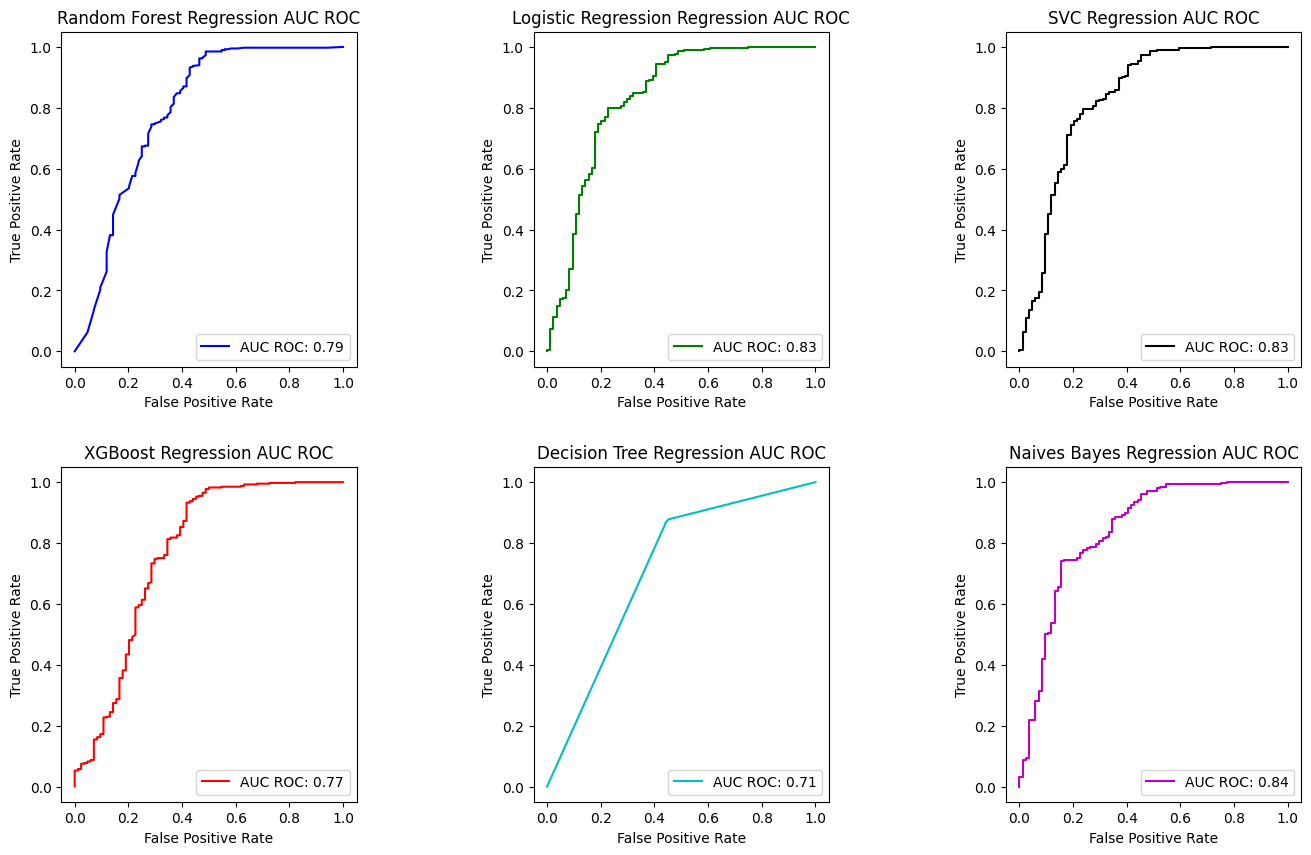

In [398]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(16, 10))
algos = [rndf,log,lsvc,xgb,dtree,gnb]
cnt = 0
colour = ["b","g","k","r","c","m"]

for i in range(0,2):
  for j in range(0,3):
    y_pred_proba = algos[cnt].predict_proba(X_scaled_test)[:,-1] if cnt != 2 else algos[cnt].decision_function(X_scaled_test)

    fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
    auc = roc_auc_score(y_test, y_pred_proba)
    axes[i,j].plot(fpr, tpr, label = "AUC ROC: {:.2f}".format(auc),color = colour[cnt])
    axes[i,j].set_xlabel('False Positive Rate')
    axes[i,j].set_ylabel('True Positive Rate')
    axes[i,j].legend(loc = "lower right")
    axes[i,j].set_title("{} Regression AUC ROC".format(list(models.keys())[cnt]))
    cnt+=1
plt.subplots_adjust(hspace=0.3, wspace=0.6)



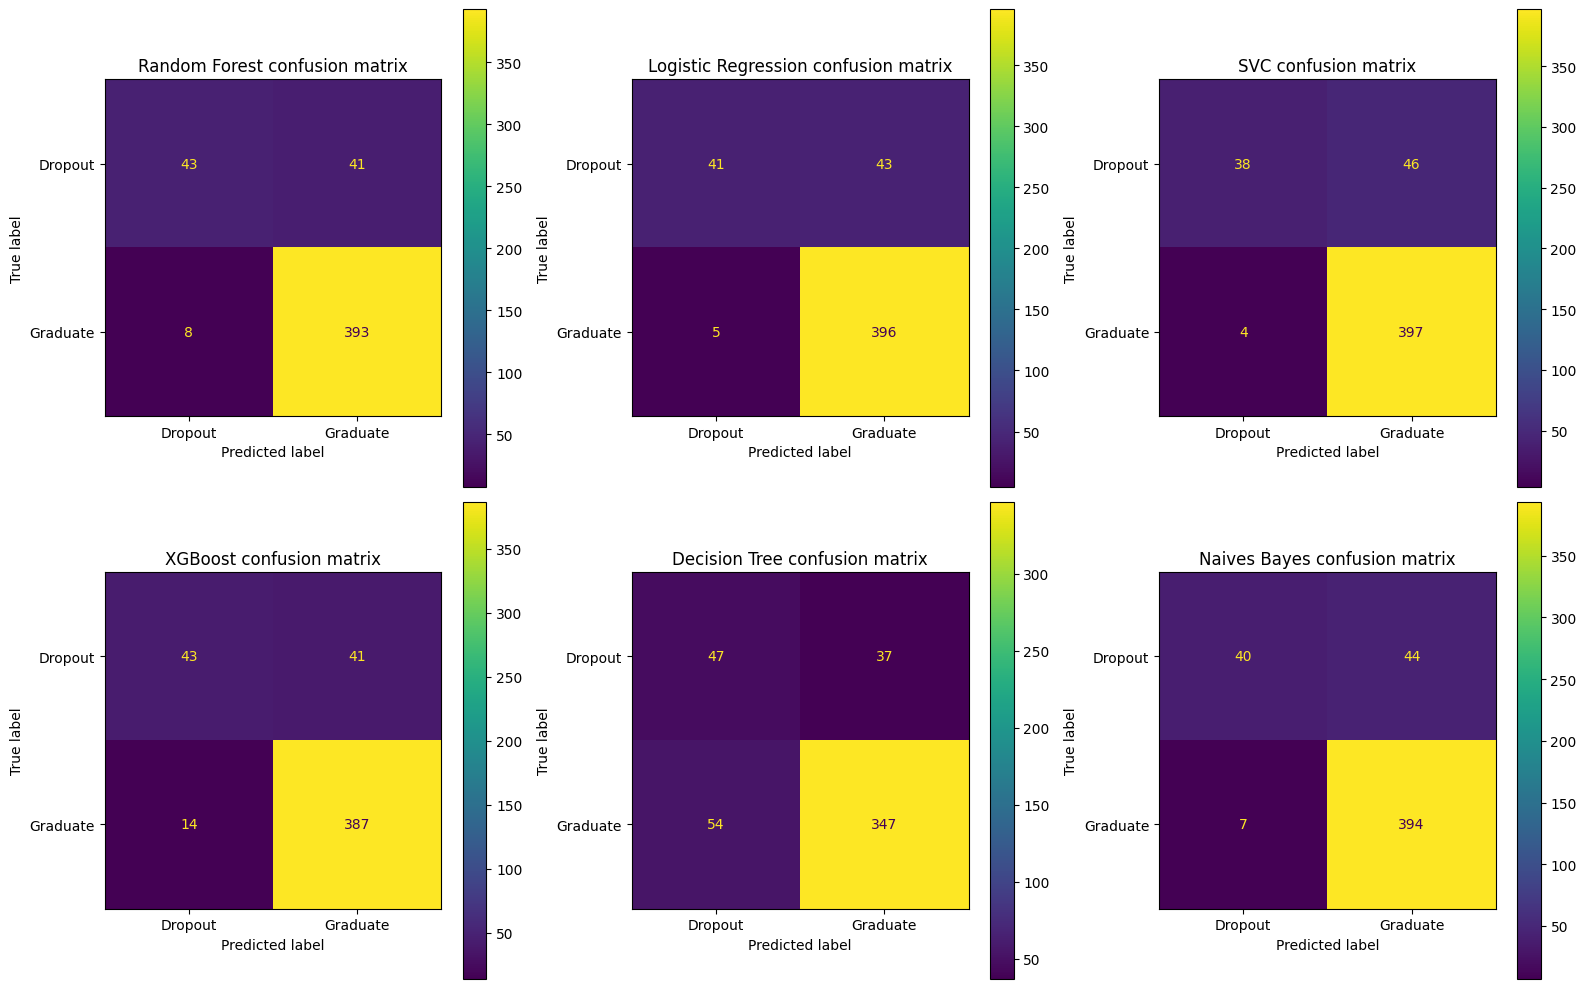

In [399]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(16, 10))
cnt = 0
for i in range(0,2):
  for j in range(0,3):
    model_pred = algos[cnt].predict(X_scaled_test)
    conf_m = confusion_matrix(y_test, model_pred)
    display = metrics.ConfusionMatrixDisplay(confusion_matrix=conf_m, display_labels=['Dropout', 'Graduate'],)
    display.plot(values_format='',ax = axes[i,j])
    display.ax_.set_title("{} confusion matrix".format(list(models.keys())[cnt]))
    cnt+=1
  plt.tight_layout()

In [400]:
Training_score = [round(i.score(X_scaled_train, y_train) * 100, 2) for i in algos]
Testing_score = [round(i.score(X_scaled_test, y_test) * 100, 2) for i in algos]

In [401]:
results_training = pd.DataFrame({"Model":list(models.keys()),"Training score":Training_score})
results_testing = pd.DataFrame({"Model":list(models.keys()),"Testing score":Testing_score})

In [402]:
print(results_training)
print(results_testing)

                 Model  Training score
0        Random Forest           99.38
1  Logistic Regression           88.45
2                  SVC           88.09
3              XGBoost           95.10
4        Decision Tree           99.38
5         Naives Bayes           88.20
                 Model  Testing score
0        Random Forest          89.90
1  Logistic Regression          90.10
2                  SVC          89.69
3              XGBoost          88.66
4        Decision Tree          81.24
5         Naives Bayes          89.48


Slight signs of overfitting but still reasonable.